In [18]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from geopy.distance import geodesic
from itertools import permutations

In [19]:
lojas = [
    {'nome': 'Loja 1', 'coordenadas': (-23.5610, -46.6342)},  
    {'nome': 'Loja 2', 'coordenadas': (-23.5678, -46.6301)},  
    {'nome': 'Loja 3', 'coordenadas': (-23.5634, -46.6192)},  
    {'nome': 'Loja 4', 'coordenadas': (-23.5605, -46.6259)},  
    {'nome': 'Loja 5', 'coordenadas': (-23.5556, -46.6241)},  
    {'nome': 'Loja 6', 'coordenadas': (-23.5417, -46.6013)},  
    {'nome': 'Loja 7', 'coordenadas': (-23.5615, -46.6274)},  
    {'nome': 'Loja 8', 'coordenadas': (-23.5698, -46.6332)},  
    {'nome': 'Loja 9', 'coordenadas': (-23.5745, -46.6191)}
    ]

In [ ]:
enderecos = {
    'Origem': (-23.550520, -46.633308),
    'Entrega 1': (-23.604836, -46.692333),
    'Entrega 2': (-23.551202, -46.634000),  
    'Entrega 3': (-23.595219, -46.684432),   
    'Entrega 4': (-23.576608, -46.663964), 
    'Entrega 5': (-23.539404, -46.658917),  
    'Entrega 6': (-23.626855, -46.702000)   
}


Menor caminho até a loja mais próxima:
Comprador -> Loja 4
Distância total: 0.14 km



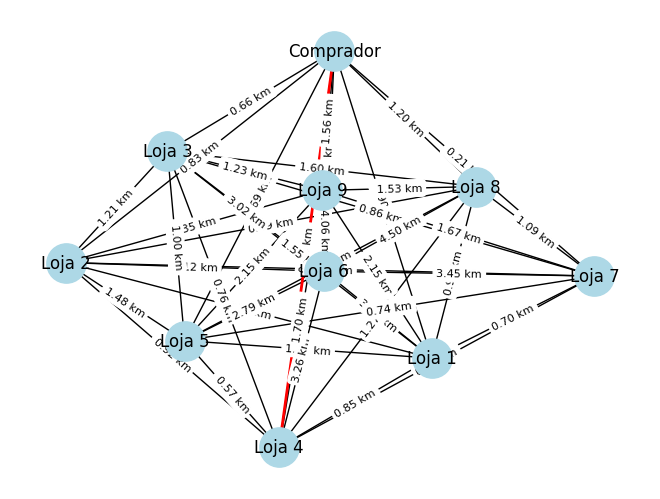

In [21]:
comprador = {'nome': 'Comprador', 'coordenadas': (-23.561684, -46.625378)}
pontos = [comprador] + lojas


G = nx.Graph()
for ponto in pontos:
    G.add_node(ponto['nome'], pos=ponto['coordenadas'])

for i in range(len(pontos)):
    for j in range(i + 1, len(pontos)):
        distancia = round(geodesic(pontos[i]['coordenadas'], pontos[j]['coordenadas']).km, 2)
        G.add_edge(pontos[i]['nome'], pontos[j]['nome'], weight=distancia)


loja_mais_proxima = min(lojas, key=lambda loja: G[comprador['nome']][loja['nome']]['weight'])
caminho = nx.shortest_path(G, source=comprador['nome'], target=loja_mais_proxima['nome'], weight='weight')
distancia = nx.shortest_path_length(G, source=comprador['nome'], target=loja_mais_proxima['nome'], weight='weight')


print("\nMenor caminho até a loja mais próxima:")
print(" -> ".join(caminho))
print(f"Distância total: {distancia:.2f} km\n")


pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=800)
nx.draw_networkx_edges(G, pos, edgelist=list(zip(caminho[:-1], caminho[1:])), edge_color='red', width=2)


labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f"{v:.2f} km" for k, v in labels.items()}, font_size=8)

plt.show()




Melhor caminho para realizar a entrega:
Origem -> Entrega8 -> Entrega11 -> Entrega10 -> Entrega9 -> Entrega7 -> Entrega12
Distância total: 14.01 km



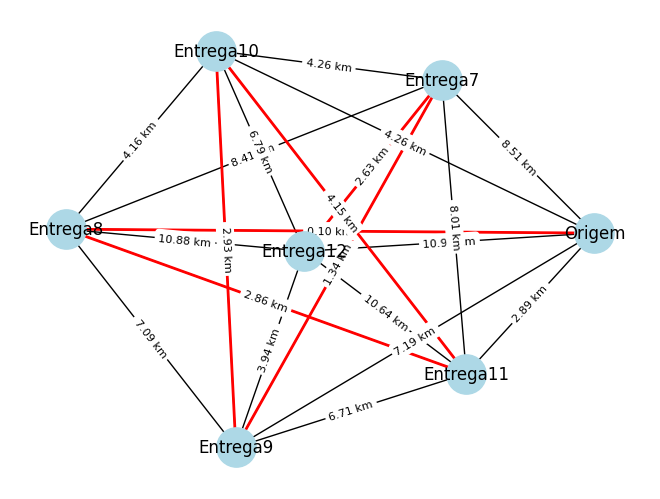

In [22]:
G.clear()

for nome1, coord1 in enderecos.items():
    for nome2, coord2 in enderecos.items():
        if nome1 != nome2:
            distancia = round(geodesic(coord1, coord2).km, 2)
            G.add_edge(nome1, nome2, weight=distancia)


entregas = [e for e in enderecos if e != 'Origem']
melhor_rota = None
menor_distancia = float('inf')

for perm in permutations(entregas):
    rota = ['Origem'] + list(perm)
    distancia_total = sum(nx.dijkstra_path_length(G, rota[i], rota[i+1], weight='weight') for i in range(len(rota) - 1))

    if distancia_total < menor_distancia:
        menor_distancia = distancia_total
        melhor_rota = rota


print("\nMelhor caminho para realizar a entrega:")
print(" -> ".join(melhor_rota))
print(f"Distância total: {menor_distancia:.2f} km\n")


pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=800)
nx.draw_networkx_edges(G, pos, edgelist=list(zip(melhor_rota[:-1], melhor_rota[1:])), edge_color='red', width=2)


labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f"{v:.2f} km" for k, v in labels.items()}, font_size=8)

plt.show()